<a href="https://colab.research.google.com/github/jcorner1/MMH_Project/blob/main/Load_Mobile_Homes_Raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Mobile Home Raster Data
The code below is to show how to load a .tif file I clipped from the original tif (https://nrcs.app.box.com/v/naip/file/1368197786261). I then did some cleaning up of the image as to make it presentable.

In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

import os
os.listdir("/content/drive/My Drive/Colab Notebooks/Sat_Images")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['ortho_1-1_hn_al127_2023_1.prj',
 'ortho_1-1_hn_al127_2023_1.xml',
 'ortho_1-1_hn_s_al127_2023_1.xml',
 'ortho_1-1_hn_s_al127_2023_1.sdw',
 'ortho_1-1_hn_s_al127_2023_1.aux',
 'ortho_1-1_hn_s_al127_2023_1.txt',
 'ortho_1-1_hn_al127_2023_1.shx',
 'ortho_1-1_hn_al127_2023_1.shp',
 'ortho_1-1_hn_al127_2023_1.dbf',
 'ortho_1-1_hn_s_al127_2023_1.sid.aux.xml',
 'ortho_1-1_hn_s_al127_2023_1.tiff',
 'ortho_1-1_hn_s_al127_2023_1.SID',
 'Mobile_Homes.tif']

# Open the TIF File

In [2]:
from osgeo import gdal
gdal.UseExceptions()

# open the .sid file
dataset = gdal.Open(r'/content/drive/My Drive/Colab Notebooks/Sat_Images/Mobile_Homes.tif')

In [3]:
# get the first raster band
band = dataset.GetRasterBand(1)

# read the data as a numpy array
data = band.ReadAsArray()

In [4]:
data.shape

(1024, 1280)

To check if the data I load was correct, I used Google's genarative AI Gemini to create a plot with the loaded data.

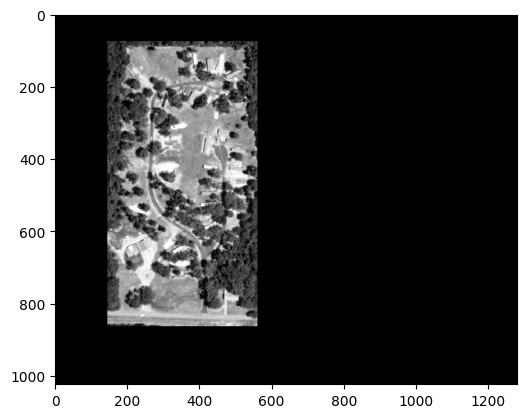

In [5]:
# prompt: create a plot with the above the variable above named data

import matplotlib.pyplot as plt

plt.imshow(data, cmap='gray')
plt.show()


# Load the Other Datas
Since the image looks correct, the other raster RBG bands need to be loaded in to create the image.

In [6]:
# get the rest of the bands
band2 = dataset.GetRasterBand(2)
band3 = dataset.GetRasterBand(3)

# read the data as a numpy array
data2 = band2.ReadAsArray()
data3 = band3.ReadAsArray()

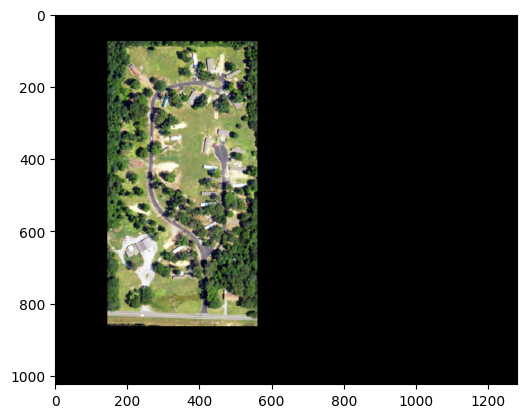

In [7]:
# prompt: generate a color image using the 3 RBG bands from a raster named data, data2, and data3
import numpy as np

# create a color image using the 3 RGB bands
color_image = np.dstack((data, data2, data3))

# display the color image
plt.imshow(color_image)
plt.show()


# Clean Up the Image
The image is correct, however the data comes with a lot of extra unneeded space that

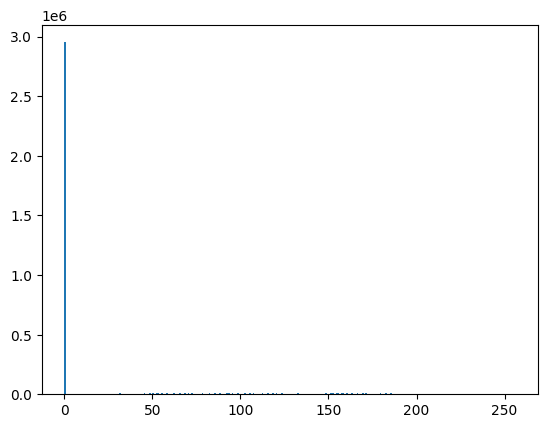

In [8]:
# prompt: create a histogram of the values within the numpy array named color_image

plt.hist(color_image.ravel(), 256, [0, 256])
plt.show()


In [9]:
# prompt: print the value that shows up the most in the numpy array named color_image

most_common_value = np.bincount(color_image.ravel()).argmax()
print(f"Most common value: {most_common_value}")


Most common value: 0


In [10]:
# prompt: create a new numpy array where all nonzero values from the numpy array color_image are convert to one and all zeros remain zero

new_array = np.where(color_image[:, :, 2] != 0, 1, 0)


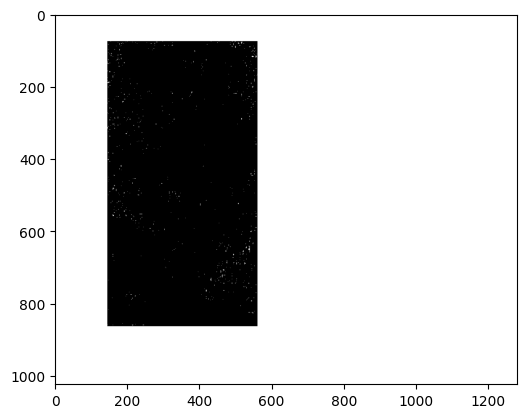

In [11]:
# prompt: create a plot of from the numpy array called new_array where zeros are white and ones are black

import matplotlib.pyplot as plt

plt.imshow(new_array, cmap='gray_r')
plt.show()


In [12]:
# prompt: find the max and min, x and y values wtih a one in them in new_array

y, x = np.where(new_array == 1)
max_x, max_y = np.max(x), np.max(y)
min_x, min_y = np.min(x), np.min(y)

print(f"Max X: {max_x}, Max Y: {max_y}")
print(f"Min X: {min_x}, Min Y: {min_y}")


Max X: 560, Max Y: 863
Min X: 145, Min Y: 75


# Final Image

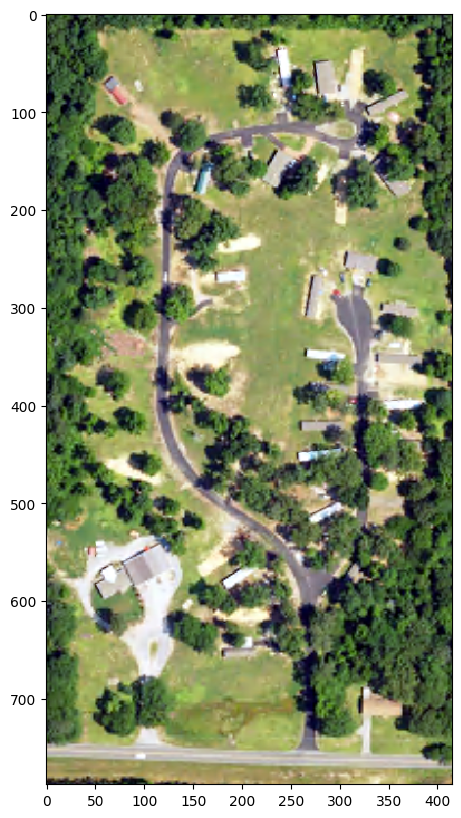

In [13]:
fig = plt.figure(figsize=(11, 10))

#subset the data based on the indicated max and min, x and y values.
new_color_image = color_image[min_y:max_y, min_x:max_x, :]


# display the color image
plt.imshow(new_color_image)
plt.show()